In [59]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [60]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances

path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-0-1.fits'
tb = fits.open(path)
data = tb[1].data 

path2 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-05-15.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 

path3 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-1-2.fits'
tb3 = fits.open(path3)
data3 = tb3[1].data 

path4 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-15-25.fits'
tb4 = fits.open(path4)
data4 = tb4[1].data 

path5 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-2-3.fits'
tb5 = fits.open(path5)
data5 = tb5[1].data 

path6 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-25-35.fits'
tb6 = fits.open(path6)
data6 = tb6[1].data 

path7 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-3-4.fits'
tb7 = fits.open(path7)
data7 = tb7[1].data 

path8 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-4-5.fits'
tb8 = fits.open(path8)
data8 = tb8[1].data 


In [61]:
# pick out the knot, bar, and disc components in every bin

def get_L(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>0.8)&(data['s_knot']<0.15)
    bar_stars = (data['P_bar']>0.8)&(data['s_bar']<0.15)
    disc_stars = (data['P_disc']>0.8)&(data['s_disc']<0.15)

    return np.dstack((data['Lx'][knot_stars],data['Ly'][knot_stars],data['Lz'][knot_stars]))[0],\
        np.dstack((data['Lx'][bar_stars],data['Ly'][bar_stars],data['Lz'][bar_stars]))[0],\
        np.dstack((data['Lx'][disc_stars],data['Ly'][disc_stars],data['Lz'][disc_stars]))[0]


In [62]:
def get_LxLyLz(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>0.8)&(data['s_knot']<0.15)
    bar_stars = (data['P_bar']>0.8)&(data['s_bar']<0.15)
    disc_stars = (data['P_disc']>0.8)&(data['s_disc']<0.15)

    return data['Lx'][knot_stars],data['Ly'][knot_stars],data['Lz'][knot_stars],\
        data['Lx'][bar_stars],data['Ly'][bar_stars],data['Lz'][bar_stars],\
        data['Lx'][disc_stars],data['Ly'][disc_stars],data['Lz'][disc_stars]


In [63]:
def get_ids(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>0.8)&(data['s_knot']<0.15)
    bar_stars = (data['P_bar']>0.8)&(data['s_bar']<0.15)
    disc_stars = (data['P_disc']>0.8)&(data['s_disc']<0.15)

    return data['APOGEE_ID'][knot_stars],data['APOGEE_ID'][bar_stars],data['APOGEE_ID'][disc_stars]


In [64]:
Lxknot = []
Lxbar = []
Lxdisc = []
Lyknot = []
Lybar = []
Lydisc = []
Lzknot = []
Lzbar = []
Lzdisc = []

Ltotknot = []
Ltotbar = []
Ltotdisc = []


datas = [data,data2,data3,data4,data5,data6,data7,data8]

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    Lxknot0,Lyknot0,Lzknot0, Lxbar0,Lybar0,Lzbar0, Lxdisc0,Lydisc0,Lzdisc0 = get_LxLyLz(i)
    
    Lxknot.append(Lxknot0)
    Lxbar.append(Lxbar0)
    Lxdisc.append(Lxdisc0)
    Lyknot.append(Lyknot0)
    Lybar.append(Lybar0)
    Lydisc.append(Lydisc0)
    Lzknot.append(Lzknot0)
    Lzbar.append(Lzbar0)
    Lzdisc.append(Lzdisc0)
    
    Ltotknot.append(np.sqrt(Lxknot0**2+Lyknot0**2+Lzknot0**2))
    Ltotbar.append(np.sqrt(Lxbar0**2+Lybar0**2+Lzbar0**2))
    Ltotdisc.append(np.sqrt(Lxdisc0**2+Lydisc0**2+Lzdisc0**2))


0it [00:00, ?it/s]

In [65]:
Lknot = []
Lbar = []
Ldisc = []


for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    Lknot0,Lbar0,Ldisc0 = get_L(i)
    
    Lknot.append(Lknot0)
    Lbar.append(Lbar0)
    Ldisc.append(Ldisc0)
    

0it [00:00, ?it/s]

In [66]:
idsknot = []
idsbar = []
idsdisc = []

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    idsknot0,idsbar0,idsdisc0= get_ids(i)
    
    idsknot.extend(idsknot0)
    idsbar.extend(idsbar0)
    idsdisc.extend(idsdisc0)
    

0it [00:00, ?it/s]

In [67]:
path_m = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb_m = fits.open(path_m)
data_m = tb_m[1].data 

In [68]:
mask_knot = np.isin(data_m['APOGEE_ID_1'],idsknot)
mask_bar = np.isin(data_m['APOGEE_ID_1'],idsbar)
mask_disc = np.isin(data_m['APOGEE_ID_1'],idsdisc)

# Plot the pattern speed of the bar as a function of radius

In [69]:
means_lz_bar = np.zeros((len(Lzbar)))
sigma_lz_bar = np.zeros((len(Lzbar)))

means_lz_disc = np.zeros((len(Lzdisc)))
sigma_lz_disc = np.zeros((len(Lzdisc)))

means_lz_knot = np.zeros((len(Lzknot)))
sigma_lz_knot = np.zeros((len(Lzknot)))

for indx, i in enumerate(Lzbar):
    means_lz_bar[indx] = np.abs(np.nanmean(i))
    sigma_lz_bar[indx] = np.abs(np.nanstd(i))
    
    means_lz_disc[indx] = np.abs(np.nanmean(Lzdisc[indx]))
    sigma_lz_disc[indx] = np.abs(np.nanstd(Lzdisc[indx]))
    
    means_lz_knot[indx] = np.abs(np.nanmean(Lzknot[indx]))
    sigma_lz_knot[indx] = np.abs(np.nanstd(Lzknot[indx]))


In [70]:
means_lz_bar

array([  8.32126687,   8.61812883,   6.06521247,  26.08775615,
        44.68004227, 169.43678115, 211.1481625 ,          nan])

(-100.0, 800.0)

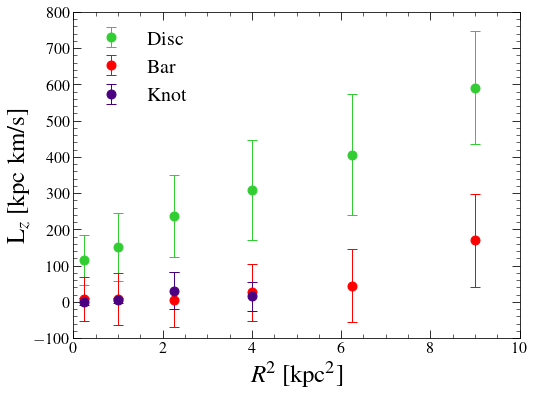

In [96]:
xs = np.array([.5,1.0,1.5,2.0,2.5,3.0])

plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(xs**2,means_lz_disc[:-2],yerr = sigma_lz_disc[:-2],fmt='o',markersize=9, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.errorbar(xs**2,means_lz_bar[:-2],yerr = sigma_lz_bar[:-2],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(xs**2,means_lz_knot[:-2],yerr = sigma_lz_knot[:-2],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot')
plt.xlabel(r'$R^{2}$ [kpc$^{2}$]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,10)
plt.ylim(-100,800)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 90.0)

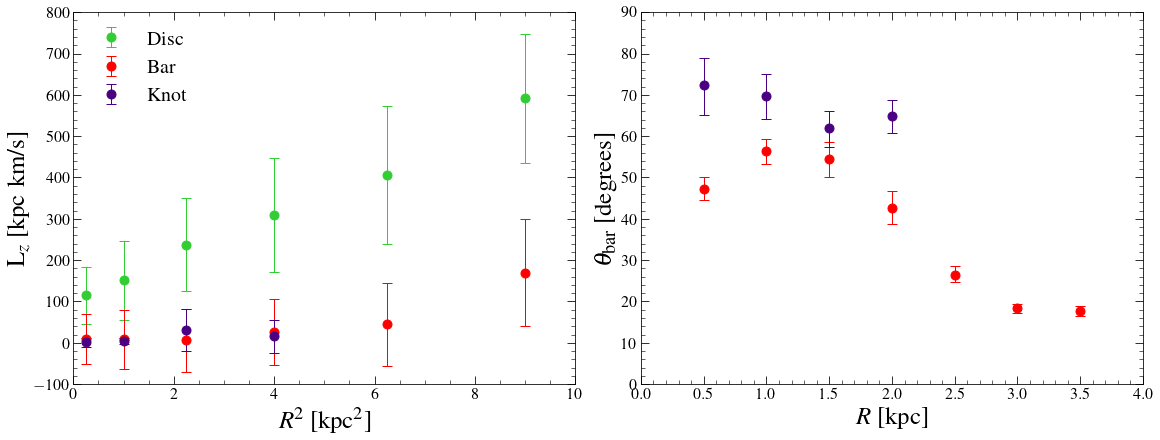

In [99]:
plt.figure(figsize=(16,6),facecolor='white',constrained_layout=True)

plt.subplot(1,2,1)
xs = np.array([.5,1.0,1.5,2.0,2.5,3.0])

# plt.title('Bar',fontsize=30)
plt.errorbar(xs**2,means_lz_disc[:-2],yerr = sigma_lz_disc[:-2],fmt='o',markersize=9, color='limegreen',ecolor='limegreen', elinewidth=1, capsize=5,label='Disc')
plt.errorbar(xs**2,means_lz_bar[:-2],yerr = sigma_lz_bar[:-2],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5,label='Bar')
plt.errorbar(xs**2,means_lz_knot[:-2],yerr = sigma_lz_knot[:-2],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5,label='Knot')
plt.xlabel(r'$R^{2}$ [kpc$^{2}$]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,10)
plt.ylim(-100,800)

plt.subplot(1,2,2)
bar_angle_mean = np.array([42.7,33.6,35.6, 47.3,63.5,71.6,72.2])
bar_angle_up = np.array([2.7,3.1,4.3,3.9,1.9,1.1,1.3])
bar_angle_down = np.array([2.8,3.,4.1,4.1,2.,1.1,1.2])

knot_angle_mean = np.array([17.6,20.2,28.1,25.1])
knot_angle_up = np.array([7.3,5.7,4.4,4.1])
knot_angle_down = np.array([6.6,5.3,4.2,3.9])


# plt.title('Bar',fontsize=30)
plt.errorbar(np.array([0.5,1.,1.5,2.,2.5,3.,3.5]),90-bar_angle_mean,yerr = [bar_angle_up,bar_angle_down],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5)
plt.errorbar(np.array([0.5,1.,1.5,2.]),90-knot_angle_mean,yerr = [knot_angle_up,knot_angle_down],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5)
plt.xlabel(r'$R$ [kpc]',fontsize=25)
plt.ylabel(r'$\theta_{\mathrm{bar}}$ [degrees]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,4)
plt.ylim(0,90)





# Use the centroid values, not the mean of the stars

In [ ]:
bar_lz_mean = np.array([])
bar_lz_up = np.array([])
bar_lz_down = np.array([])






In [87]:
print(len(knot_angle_mean))

4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 90.0)

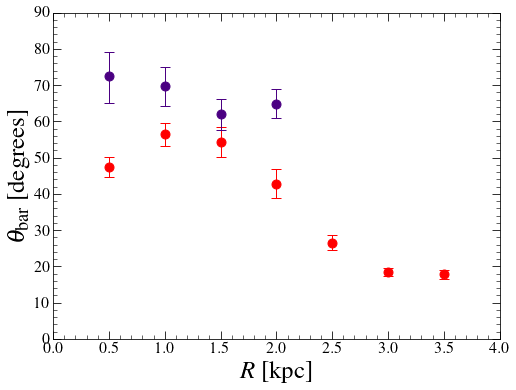

In [90]:
# bar_angle_mean = np.array([76.9,76.5,74., 69.5,74.4,73.6])
# bar_angle_up = np.array([7.4,3.5,2.0,2.1,0.6,0.9])
# bar_angle_down = np.array([6.6,3.6,2.0,2.1,0.6,0.9])
bar_angle_mean = np.array([42.7,33.6,35.6, 47.3,63.5,71.6,72.2])
bar_angle_up = np.array([2.7,3.1,4.3,3.9,1.9,1.1,1.3])
bar_angle_down = np.array([2.8,3.,4.1,4.1,2.,1.1,1.2])

knot_angle_mean = np.array([17.6,20.2,28.1,25.1])
knot_angle_up = np.array([7.3,5.7,4.4,4.1])
knot_angle_down = np.array([6.6,5.3,4.2,3.9])




plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(np.array([0.5,1.,1.5,2.,2.5,3.,3.5]),90-bar_angle_mean,yerr = [bar_angle_up,bar_angle_down],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5)
plt.errorbar(np.array([0.5,1.,1.5,2.]),90-knot_angle_mean,yerr = [knot_angle_up,knot_angle_down],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5)
plt.xlabel(r'$R$ [kpc]',fontsize=25)
plt.ylabel(r'$\theta_{\mathrm{bar}}$ [degrees]',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
plt.xlim(0,4)
plt.ylim(0,90)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


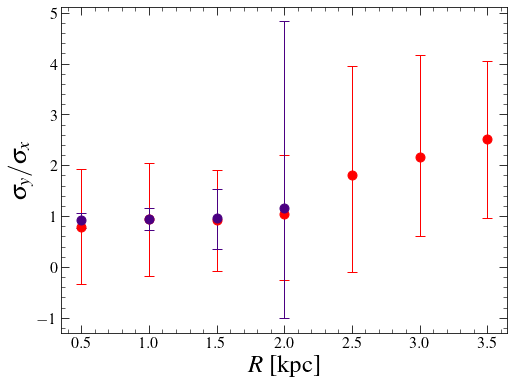

In [94]:
# bar_angle_mean = np.array([76.9,76.5,74., 69.5,74.4,73.6])
# bar_angle_up = np.array([7.4,3.5,2.0,2.1,0.6,0.9])
# bar_angle_down = np.array([6.6,3.6,2.0,2.1,0.6,0.9])
bar_sigmasx_mean = np.array([49.2,49.7,59.3,63.3,56.1,85.5,78.3])
bar_sigmasx_up = np.array([2.3,2.4,3.4,3.5,2.3,1.8,3.2])
bar_sigmasx_down = np.array([2.3,2.3,3.4,3.5,1.9,1.5,3.0])

knot_sigmasx_mean = np.array([10.9,10.6,10.9,10.4])
knot_sigmasx_up = np.array([1.3,0.9,1.3,0.6])
knot_sigmasx_down = np.array([0.7,0.5,0.7,0.3])

bar_sigmasy_mean = np.array([38.8,47.3,55.0,65.6,101.2,184.7,197.1])
bar_sigmasy_up = np.array([2.6,2.7,3.4,4.5,4.4,2.8,5.0])
bar_sigmasy_down = np.array([2.6,2.5,3.3,4.1,4.1,3.0,4.6])


knot_sigmasy_mean = np.array([10.1,10.1,10.5,12.1])
knot_sigmasy_up = np.array([0.2,0.2,0.8,1.3])
knot_sigmasy_down = np.array([0.1,0.1,0.4,1.1])

rat_mean_bar = bar_sigmasy_mean/bar_sigmasx_mean
rat_up_bar = bar_sigmasy_up/bar_sigmasx_up
rat_low_bar = bar_sigmasy_down/bar_sigmasx_down

rat_mean_knot = knot_sigmasy_mean/knot_sigmasx_mean
rat_up_knot = knot_sigmasy_up/knot_sigmasx_up
rat_low_knot = knot_sigmasy_down/knot_sigmasx_down

plt.figure(figsize=(8,6),facecolor='white')
# plt.title('Bar',fontsize=30)
plt.errorbar(np.array([0.5,1.,1.5,2.,2.5,3.,3.5]),rat_mean_bar,yerr = [rat_up_bar,rat_low_bar],fmt='o',markersize=9, color='r',ecolor='r', elinewidth=1, capsize=5)
plt.errorbar(np.array([0.5,1.,1.5,2.]),rat_mean_knot,yerr = [rat_up_knot,rat_low_knot],fmt='o',markersize=9, color='indigo',ecolor='indigo', elinewidth=1, capsize=5)
plt.xlabel(r'$R$ [kpc]',fontsize=25)
plt.ylabel(r'$\sigma_{y}/\sigma_{x}$',fontsize=25)
plt.legend(loc='upper left',fontsize=20,frameon=False)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.yscale('log')
# plt.xlim(0,4)
# plt.ylim(0,90)

